In [186]:
import pandas as pd
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [187]:
import zero

from zero.als import MangakiALS

ratings_table = pd.read_csv("ratings.csv")

In [188]:
ratings_table.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [189]:
ratings_table["userId"] = np.unique(ratings_table["userId"], return_inverse=True)[1]
ratings_table["movieId"] = np.unique(ratings_table["movieId"], return_inverse=True)[1]

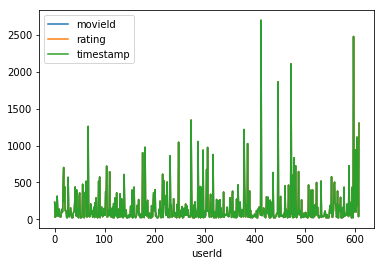

In [190]:
ratings_table.groupby("userId").count().plot()

In [191]:
nb_users = max(ratings_table['userId'])

In [192]:
ratings_table.groupby("userId").count().loc[1, 'rating']

29

In [193]:
users_sorted = ratings_table.groupby("userId").count().sort_values('rating')

In [194]:
movies_sorted = ratings_table.groupby("movieId").count().sort_values('rating')
movies_sorted_list = movies_sorted.index.to_list()
nb_works = len(movies_sorted)

In [195]:
ratings_table.query('userId == 1')

,userId,movieId,rating,timestamp
232,1,277,3.0,1445714835
233,1,291,4.0,1445715029
234,1,1283,4.5,1445715228
235,1,2670,4.0,1445714885
236,1,4607,4.0,1445714952
237,1,5294,3.5,1445714960
238,1,6236,4.0,1445715013
239,1,6298,4.0,1445715064
240,1,6693,4.5,1445715141
241,1,6784,5.0,1445714980


In [196]:
users_sorted_list = users_sorted.index.to_list()

In [197]:
users_training_set = users_sorted_list[:math.floor(len(users_sorted_list)*0.9)]
nb_users = len(users_sorted_list)

In [198]:
users_test_set = users_sorted_list[math.floor(len(users_sorted_list)*0.9) :]

In [199]:
training_ratings_table = ratings_table.query('userId in @users_training_set')

In [200]:
X_train = np.array(training_ratings_table[['userId', 'movieId']])

In [201]:
y_train = training_ratings_table['rating']

In [202]:
als = MangakiALS(20)
als.set_parameters(nb_users, nb_works)
als.fit(X_train, y_train)

Computing M: (610 × 9724)
Shapes (610, 20) (20, 9724)


In [209]:
users_selected_for_testing = []
nb_users_tested = 10
for _ in range(nb_users_tested):
    i = rd.randint(0,len(users_test_set) - 1)
    users_selected_for_testing.append(users_test_set[i])    

In [210]:
def normalize(U):
    norm = 0
    for x in U :
        norm += x*x
    norm = math.sqrt(norm)
    if norm == 0 :
        return U
    else :
        return U/norm

In [211]:
K = 10
U_list = []

for u in users_selected_for_testing :
    U= []
    u_table = ratings_table.query('userId == ' + str(u) )
    n = len(u_table)
    u_works = []
    u_ratings = []
    for i in range(n) :
        u_works.append(u_table['movieId'].iloc[i])
        u_ratings.append(u_table['rating'].iloc[i])
    for i in range(K) :
        mean_u, feat_u = als.fit_single_user(u_works[math.floor(n * (i/K)) : math.floor(n * ((i+1)/K))], u_ratings[math.floor(n * (i/K)) : math.floor(n * ((i+1)/K))])
        feat_u = normalize(feat_u)
        U.append(feat_u)
    U_list.append(np.array(U))

In [212]:
comparison_matrices =[]

for U in U_list :
    comparison_matrices.append(np.dot(U,U.transpose()))

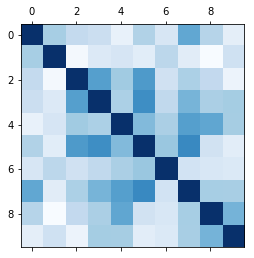

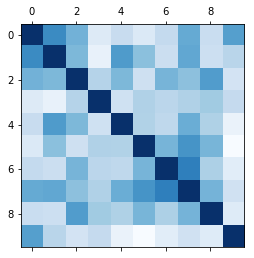

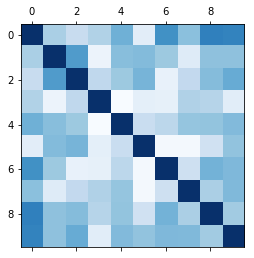

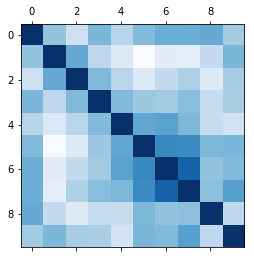

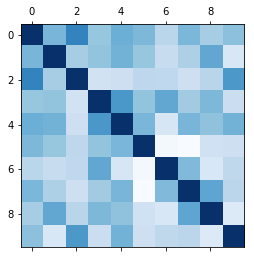

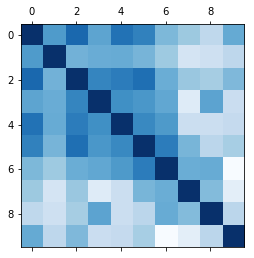

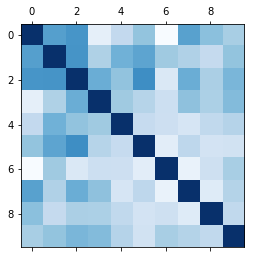

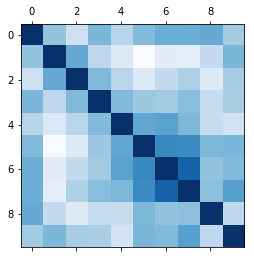

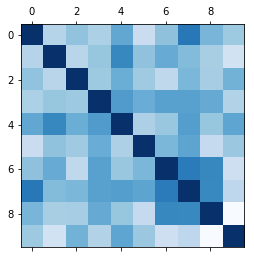

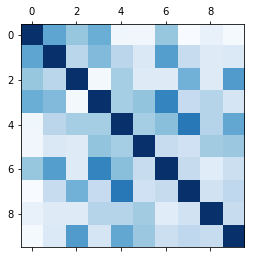

In [213]:
for U in comparison_matrices :
    plt.matshow(U+1, cmap=plt.cm.Blues)